# Torch scaling
> Exploring how sample size (and other things, maybe) affects accuracy of our inference

In [1]:
import sys
sys.path.append('/home/phil/aptr')
%load_ext autoreload
%autoreload 2

In [7]:
from src.simulation import simulate_from_ids
from src.torch_solver import solve_table
from src.database import RnaDB

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/home/phil/miniconda3/envs/aPTR/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/phil/miniconda3/envs/aPTR/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/phil/miniconda3/envs/aPTR/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

Simulating sample 1/10:
	Genome 1/10:	156889.10
	Genome 2/10:	439292.5
	Genome 3/10:	1405.10
	Genome 4/10:	1246626.3
	Genome 5/10:	478801.5
	Genome 6/10:	56110.3
	Genome 7/10:	347257.7
	Genome 8/10:	59374.5
	Genome 9/10:	38313.12
	Genome 10/10:	997830.4
Simulating sample 2/10:
	Genome 1/10:	156889.10
	Genome 2/10:	439292.5
	Genome 3/10:	1405.10
	Genome 4/10:	1246626.3
	Genome 5/10:	478801.5
	Genome 6/10:	56110.3
	Genome 7/10:	347257.7
	Genome 8/10:	59374.5
	Genome 9/10:	38313.12
	Genome 10/10:	997830.4
Simulating sample 3/10:
	Genome 1/10:	156889.10
	Genome 2/10:	439292.5
	Genome 3/10:	1405.10
	Genome 4/10:	1246626.3
	Genome 5/10:	478801.5
	Genome 6/10:	56110.3
	Genome 7/10:	347257.7
	Genome 8/10:	59374.5
	Genome 9/10:	38313.12
	Genome 10/10:	997830.4
Simulating sample 4/10:
	Genome 1/10:	156889.10
	Genome 2/10:	439292.5
	Genome 3/10:	1405.10
	Genome 4/10:	1246626.3
	Genome 5/10:	478801.5
	Genome 6/10:	56110.3
	Genome 7/10:	347257.7
	Genome 8/10:	59374.5
	Genome 9/10:	38313.12
	Genome 

/home/phil/miniconda3/envs/aPTR/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/phil/miniconda3/envs/aPTR/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Simulating sample 1/10:
	Genome 1/10:	156889.10
	Genome 2/10:	439292.5
	Genome 3/10:	1405.10
	Genome 4/10:	1246626.3
	Genome 5/10:	478801.5
	Genome 6/10:	56110.3
	Genome 7/10:	347257.7
	Genome 8/10:	59374.5
	Genome 9/10:	38313.12
	Genome 10/10:	997830.4
Simulating sample 2/10:
	Genome 1/10:	156889.10
	Genome 2/10:	439292.5
	Genome 3/10:	1405.10
	Genome 4/10:	1246626.3
	Genome 5/10:	478801.5
	Genome 6/10:	56110.3
	Genome 7/10:	347257.7
	Genome 8/10:	59374.5
	Genome 9/10:	38313.12
	Genome 10/10:	997830.4
Simulating sample 3/10:
	Genome 1/10:	156889.10
	Genome 2/10:	439292.5
	Genome 3/10:	1405.10
	Genome 4/10:	1246626.3
	Genome 5/10:	478801.5
	Genome 6/10:	56110.3
	Genome 7/10:	347257.7
	Genome 8/10:	59374.5
	Genome 9/10:	38313.12
	Genome 10/10:	997830.4
Simulating sample 4/10:
	Genome 1/10:	156889.10
	Genome 2/10:	439292.5
	Genome 3/10:	1405.10
	Genome 4/10:	1246626.3
	Genome 5/10:	478801.5
	Genome 6/10:	56110.3
	Genome 7/10:	347257.7
	Genome 8/10:	59374.5
	Genome 9/10:	38313.12
	Genome 

/home/phil/miniconda3/envs/aPTR/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/phil/miniconda3/envs/aPTR/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Simulating sample 1/10:
	Genome 1/10:	156889.10
	Genome 2/10:	439292.5
	Genome 3/10:	1405.10
	Genome 4/10:	1246626.3
	Genome 5/10:	478801.5
	Genome 6/10:	56110.3
	Genome 7/10:	347257.7
	Genome 8/10:	59374.5
	Genome 9/10:	38313.12
	Genome 10/10:	997830.4
Simulating sample 2/10:
	Genome 1/10:	156889.10
	Genome 2/10:	439292.5
	Genome 3/10:	1405.10
	Genome 4/10:	1246626.3
	Genome 5/10:	478801.5
	Genome 6/10:	56110.3
	Genome 7/10:	347257.7
	Genome 8/10:	59374.5
	Genome 9/10:	38313.12
	Genome 10/10:	997830.4
Simulating sample 3/10:
	Genome 1/10:	156889.10
	Genome 2/10:	439292.5
	Genome 3/10:	1405.10
	Genome 4/10:	1246626.3
	Genome 5/10:	478801.5
	Genome 6/10:	56110.3
	Genome 7/10:	347257.7
	Genome 8/10:	59374.5
	Genome 9/10:	38313.12
	Genome 10/10:	997830.4
Simulating sample 4/10:
	Genome 1/10:	156889.10
	Genome 2/10:	439292.5
	Genome 3/10:	1405.10
	Genome 4/10:	1246626.3
	Genome 5/10:	478801.5
	Genome 6/10:	56110.3
	Genome 7/10:	347257.7
	Genome 8/10:	59374.5
	Genome 9/10:	38313.12
	Genome 

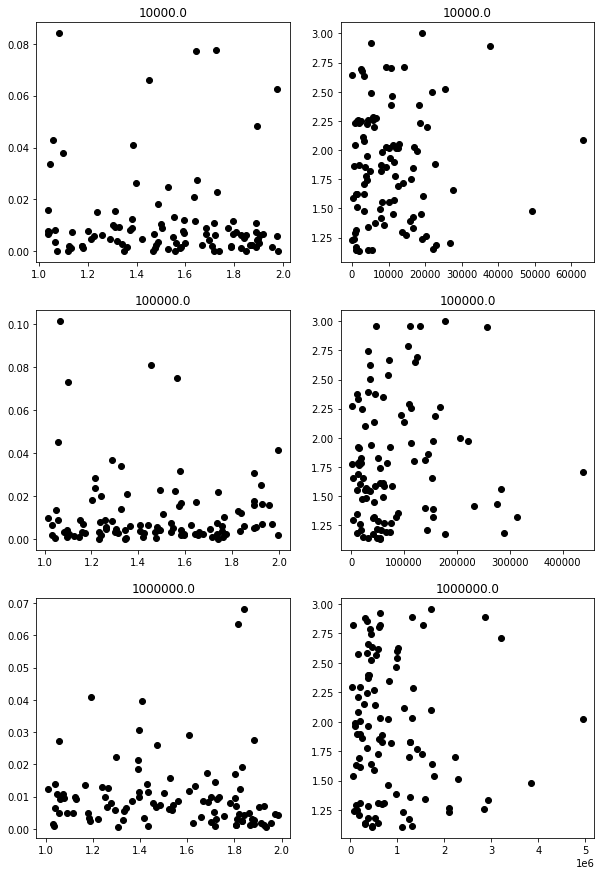

In [9]:
# This takes ~30 minutes to run
# This shows a distubing trend: model gets worse with larger sample sizes. Why?

genomes = np.random.choice(RnaDB().genomes, size=10, replace=False)
fig, axs = plt.subplots(3, 2, figsize=(10, 15))

for i, scale in enumerate([1e4, 1e5, 1e6]):
    # Simulate
    _, coverages, ptrs, otu_matrix = simulate_from_ids(ids=genomes, scale=scale)
    # Solve
    solutions = solve_table(otu_matrix, genomes)
    # Plot
    for a,b,solution in zip(coverages, ptrs, solutions):
        a_hat, b_hat, _ = solution
        axs[i,0].scatter(a, np.exp(a_hat), color="k")
        axs[i,0].set_title(scale)
        axs[i,1].scatter(b, np.exp(b_hat), color="k")
        axs[i,1].set_title(scale)


In [80]:
# Something is wrong here. Let's see if changing the initial guesses is useful.

_, ptrs, coverages, otu_matrix = simulate_from_ids(ids=genomes, scale=1e7)

/home/phil/miniconda3/envs/aPTR/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/phil/miniconda3/envs/aPTR/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Simulating sample 1/10:
	Genome 1/10:	156889.10
	Genome 2/10:	439292.5
	Genome 3/10:	1405.10
	Genome 4/10:	1246626.3
	Genome 5/10:	478801.5
	Genome 6/10:	56110.3
	Genome 7/10:	347257.7
	Genome 8/10:	59374.5
	Genome 9/10:	38313.12
	Genome 10/10:	997830.4
Simulating sample 2/10:
	Genome 1/10:	156889.10
	Genome 2/10:	439292.5
	Genome 3/10:	1405.10
	Genome 4/10:	1246626.3
	Genome 5/10:	478801.5
	Genome 6/10:	56110.3
	Genome 7/10:	347257.7
	Genome 8/10:	59374.5
	Genome 9/10:	38313.12
	Genome 10/10:	997830.4
Simulating sample 3/10:
	Genome 1/10:	156889.10
	Genome 2/10:	439292.5
	Genome 3/10:	1405.10
	Genome 4/10:	1246626.3
	Genome 5/10:	478801.5
	Genome 6/10:	56110.3
	Genome 7/10:	347257.7
	Genome 8/10:	59374.5
	Genome 9/10:	38313.12
	Genome 10/10:	997830.4
Simulating sample 4/10:
	Genome 1/10:	156889.10
	Genome 2/10:	439292.5
	Genome 3/10:	1405.10
	Genome 4/10:	1246626.3
	Genome 5/10:	478801.5
	Genome 6/10:	56110.3
	Genome 7/10:	347257.7
	Genome 8/10:	59374.5
	Genome 9/10:	38313.12
	Genome 

/home/phil/miniconda3/envs/aPTR/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/phil/miniconda3/envs/aPTR/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


torch.Size([10, 44])
Epoch 0:	 38.937583923339844
Epoch 1:	 32.505149841308594
Epoch 2:	 27.328964233398438
Epoch 3:	 23.06730842590332
Epoch 4:	 19.510066986083984
Epoch 5:	 16.517845153808594
Epoch 6:	 13.99061107635498
Epoch 7:	 11.851771354675293
Epoch 8:	 10.039849281311035
Epoch 9:	 8.504239082336426
Epoch 10:	 7.202602863311768
Epoch 11:	 6.099245071411133
Epoch 12:	 5.163984298706055
Epoch 13:	 4.371312141418457
Epoch 14:	 3.699537992477417
Epoch 15:	 3.130251407623291
Epoch 16:	 2.6479291915893555
Epoch 17:	 2.2393627166748047
Epoch 18:	 1.8932454586029053
Epoch 19:	 1.600059151649475
Epoch 20:	 1.351810097694397
Epoch 21:	 1.1416453123092651
Epoch 22:	 0.96370929479599
Epoch 23:	 0.8131895661354065
Epoch 24:	 0.685814380645752
Epoch 25:	 0.5780463218688965
Epoch 26:	 0.4869430959224701
Epoch 27:	 0.40994569659233093
Epoch 28:	 0.3448541760444641
Epoch 29:	 0.2898652255535126
Epoch 30:	 0.2434586137533188
Epoch 31:	 0.20427659153938293
Epoch 32:	 0.1712353527545929
Epoch 33:	 

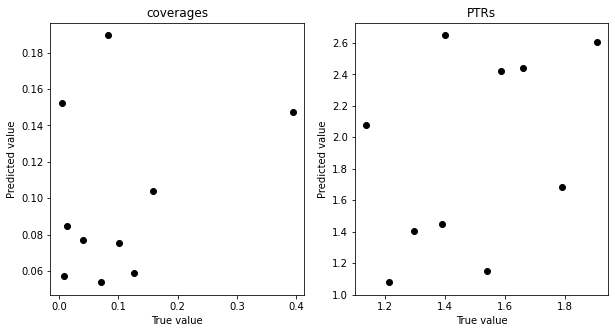

In [86]:
# Let's optimize just one sample, for speed
# First, let's see what we get with a regular system:

def init_experiment(a_hat, b_hat):
    solver = TorchSolver(
        genomes=RnaDB().generate_genome_objects(genomes)[0], coverages=otu_matrix[0]
    )
    print(solver.dists.shape)

    # a_hat, b_hat, losses = solver.train(epsilon=1e-10, tolerance=20, a_hat=a_hat, b_hat=b_hat)
    solver.train(epsilon=1e-10, tolerance=20, a_hat=a_hat, b_hat=b_hat)

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].scatter(coverages[0] / np.sum(coverages[0]), torch.exp(solver.a_hat) / torch.sum(torch.exp(solver.a_hat)), color="k")
    axs[0].set_title("coverages")
    axs[0].set_xlabel("True value")
    axs[0].set_ylabel("Predicted value")

    axs[1].scatter(ptrs[0], np.exp(solver.b_hat), color="k")
    axs[1].set_title("PTRs")
    axs[1].set_xlabel("True value")
    axs[1].set_ylabel("Predicted value")

init_experiment(a_hat=None, b_hat=None)

/home/phil/miniconda3/envs/aPTR/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/phil/miniconda3/envs/aPTR/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


torch.Size([10, 44])
Epoch 0:	 11.291425704956055
Epoch 1:	 9.418802261352539
Epoch 2:	 7.912622928619385
Epoch 3:	 6.673126220703125
Epoch 4:	 5.638992786407471
Epoch 5:	 4.769540786743164
Epoch 6:	 4.035583019256592
Epoch 7:	 3.414764165878296
Epoch 8:	 2.889151096343994
Epoch 9:	 2.443976640701294
Epoch 10:	 2.0669052600860596
Epoch 11:	 1.747511386871338
Epoch 12:	 1.476995825767517
Epoch 13:	 1.2479592561721802
Epoch 14:	 1.0540368556976318
Epoch 15:	 0.8899043202400208
Epoch 16:	 0.7509891390800476
Epoch 17:	 0.6334308981895447
Epoch 18:	 0.5339893698692322
Epoch 19:	 0.44990694522857666
Epoch 20:	 0.3788093626499176
Epoch 21:	 0.31874147057533264
Epoch 22:	 0.26799142360687256
Epoch 23:	 0.22513824701309204
Epoch 24:	 0.1889605075120926
Epoch 25:	 0.15844064950942993
Epoch 26:	 0.13271208107471466
Epoch 27:	 0.11102699488401413
Epoch 28:	 0.09277306497097015
Epoch 29:	 0.07740666717290878
Epoch 30:	 0.06448492407798767
Epoch 31:	 0.05362476035952568
Epoch 32:	 0.0445161424577236

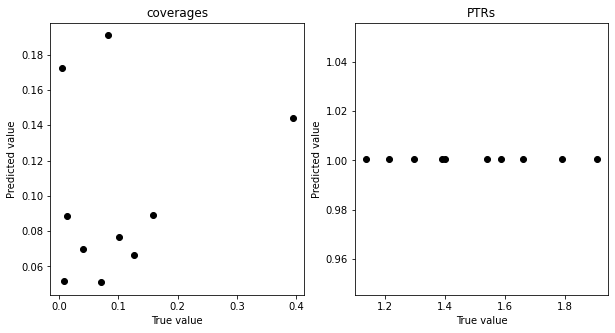

In [118]:
# If you init to zeros:

init_experiment(a_hat=np.zeros(10), b_hat=np.zeros(10))

/home/phil/miniconda3/envs/aPTR/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/phil/miniconda3/envs/aPTR/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


torch.Size([10, 44])
Epoch 0:	 62.33528137207031
Epoch 1:	 52.05033874511719
Epoch 2:	 43.77278137207031
Epoch 3:	 36.95671081542969
Epoch 4:	 31.26643943786621
Epoch 5:	 26.479284286499023
Epoch 6:	 22.435380935668945
Epoch 7:	 19.01232147216797
Epoch 8:	 16.111988067626953
Epoch 9:	 13.653412818908691
Epoch 10:	 11.568953514099121
Epoch 11:	 9.801615715026855
Epoch 12:	 8.303183555603027
Epoch 13:	 7.032774448394775
Epoch 14:	 5.95580530166626
Epoch 15:	 5.042827606201172
Epoch 16:	 4.269052505493164
Epoch 17:	 3.6132447719573975
Epoch 18:	 3.057504415512085
Epoch 19:	 2.586595058441162
Epoch 20:	 2.18758487701416
Epoch 21:	 1.8496530055999756
Epoch 22:	 1.5634028911590576
Epoch 23:	 1.3209805488586426
Epoch 24:	 1.11575448513031
Epoch 25:	 0.9420133233070374
Epoch 26:	 0.7949573993682861
Epoch 27:	 0.6705880761146545
Epoch 28:	 0.5653514266014099
Epoch 29:	 0.4763304889202118
Epoch 30:	 0.4011000692844391
Epoch 31:	 0.3375124931335449
Epoch 32:	 0.28377771377563477
Epoch 33:	 0.2384

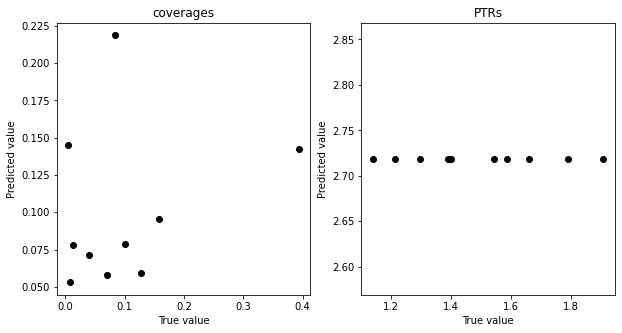

In [88]:
# If you init to ones:

init_experiment(a_hat=np.ones(10), b_hat=np.ones(10))

/home/phil/miniconda3/envs/aPTR/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/phil/miniconda3/envs/aPTR/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/phil/miniconda3/envs/aPTR/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

torch.Size([10, 44])
Epoch 0:	 22.254724502563477
Epoch 1:	 18.573226928710938
Epoch 2:	 15.611217498779297
Epoch 3:	 13.172929763793945
Epoch 4:	 11.1380033493042
Epoch 5:	 9.426592826843262
Epoch 6:	 7.981398582458496
Epoch 7:	 6.758533000946045
Epoch 8:	 5.722812652587891
Epoch 9:	 4.845224380493164
Epoch 10:	 4.1015238761901855
Epoch 11:	 3.4713499546051025
Epoch 12:	 2.93730092048645
Epoch 13:	 2.4847660064697266
Epoch 14:	 2.1014463901519775
Epoch 15:	 1.7767122983932495
Epoch 16:	 1.5016696453094482
Epoch 17:	 1.2688018083572388
Epoch 18:	 1.071614384651184
Epoch 19:	 0.904682457447052
Epoch 20:	 0.7634502053260803
Epoch 21:	 0.6439414024353027
Epoch 22:	 0.542827308177948
Epoch 23:	 0.4573288559913635
Epoch 24:	 0.3850598931312561
Epoch 25:	 0.323974072933197
Epoch 26:	 0.2723804712295532
Epoch 27:	 0.22880440950393677
Epoch 28:	 0.19203196465969086
Epoch 29:	 0.16099746525287628
Epoch 30:	 0.13484543561935425
Epoch 31:	 0.11280706524848938
Epoch 32:	 0.0942392647266388
Epoch 3

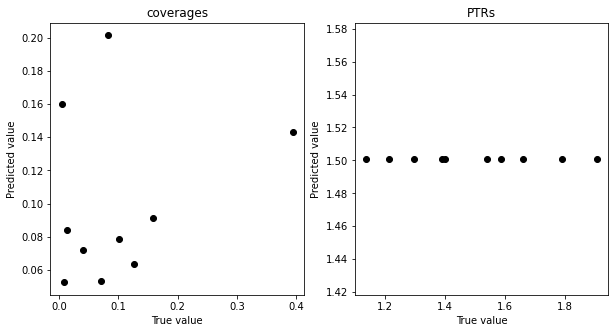

In [117]:
# log 1.5?

init_experiment(a_hat=np.log(1.5 + np.zeros(10)), b_hat=np.log(1.5 + np.zeros(10)))

In [94]:
solver = TorchSolver(
    genomes=RnaDB().generate_genome_objects(genomes)[0], coverages=otu_matrix[0]
)

/home/phil/miniconda3/envs/aPTR/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/phil/miniconda3/envs/aPTR/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [116]:
solver.a_hat = torch.ones(10, requires_grad=True)
solver.b_hat = torch.ones(10, requires_grad=True)
optimizer = torch.optim.Adam([solver.a_hat, solver.b_hat], lr=1e-1)

for _ in range(200):
    optimizer.zero_grad()
    f = solver()
    loss = torch.nn.functional.mse_loss(f, solver.coverages)
    loss.backward()
    optimizer.step()
    # solver.a_hat.data -= 1e-4 * solver.a_hat.grad.data
    # solver.b_hat.data -= 1e-4 * solver.b_hat.grad.data
    print(solver.a_hat)

tensor([0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000,
        0.9000], requires_grad=True)
tensor([0.8013, 0.8012, 0.8011, 0.8013, 0.8016, 0.8014, 0.8015, 0.8015, 0.8013,
        0.8011], requires_grad=True)
tensor([0.7048, 0.7042, 0.7039, 0.7047, 0.7056, 0.7049, 0.7053, 0.7055, 0.7048,
        0.7041], requires_grad=True)
tensor([0.6110, 0.6097, 0.6091, 0.6109, 0.6129, 0.6113, 0.6122, 0.6126, 0.6109,
        0.6095], requires_grad=True)
tensor([0.5205, 0.5181, 0.5171, 0.5202, 0.5238, 0.5209, 0.5227, 0.5233, 0.5203,
        0.5178], requires_grad=True)
tensor([0.4336, 0.4298, 0.4282, 0.4330, 0.4389, 0.4343, 0.4371, 0.4380, 0.4332,
        0.4293], requires_grad=True)
tensor([0.3506, 0.3450, 0.3427, 0.3497, 0.3582, 0.3515, 0.3557, 0.3569, 0.3498,
        0.3443], requires_grad=True)
tensor([0.2716, 0.2639, 0.2608, 0.2702, 0.2818, 0.2728, 0.2785, 0.2801, 0.2702,
        0.2630], requires_grad=True)
tensor([0.1966, 0.1866, 0.1826, 0.1946, 0.2098, 0.1980, 0.2055, 

In [102]:
print(solver.a_hat.grad)

tensor([ 9.8830, 21.7543, 70.6281, 23.1274,  2.9850,  5.4413,  3.3436,  4.6196,
         4.9553,  4.9908])


In [103]:
print(solver.b_hat.grad)

tensor([-2.0149, -2.1896, -3.5877, -4.7100, -1.0209, -1.2509, -0.9902, -1.5047,
        -1.0709, -0.4328])


In [105]:
solver.a_hat

tensor([0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000,
        0.9000], requires_grad=True)